# Image Forgery Detection


In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
from PIL import Image, ImageChops, ImageEnhance
from sklearn.metrics import classification_report
import os 
import joblib
PATH_IMG = "C:\\Users\\jayas\\Downloads\\dip\\CASIA2"

In [2]:
data_label = ['Au', 'Tp']
label_lst = []
img_lst = []
for label in data_label:
    for img_file in os.listdir(PATH_IMG+'\\'+label):
        img_lst.append(PATH_IMG+'\\'+label+'\\'+img_file)
        label_lst.append(label)
df = pd.DataFrame({'img': img_lst, 'label': label_lst})

In [3]:
df_AU=df[:1000]
df_TP=df[-1000:]

### JPEG Compression


In [4]:
PATH_RESAVED = "C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Resaved"

def resave(quality,data):
        
    for index, row  in data.iterrows():
        img_file = row['img']
        img = Image.open(img_file).convert('RGB')
        img_file = img_file.split('\\')[-1]
        resaved_name = img_file.split('.')[0]
        resaved_name = PATH_RESAVED+"\\"+resaved_name + 'resaved' + '.jpg'
        img.save(resaved_name, 'JPEG' ,quality=quality, optimize=True)

In [5]:
resave(90,df_AU)

In [6]:
resave(90,df_TP)

In [7]:
df_AU['img_resaved'] = df_AU['img'].apply(lambda x: PATH_RESAVED+'\\'+ x.split('\\')[-1].split('.')[0] + 'resaved' + '.jpg')
df_AU.head()

C:\Users\jayas\AppData\Local\Temp\ipykernel_17652\1568921579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AU['img_resaved'] = df_AU['img'].apply(lambda x: PATH_RESAVED+'\\'+ x.split('\\')[-1].split('.')[0] + 'resaved' + '.jpg')


,img,label,img_resaved
0,C:\Users\jayas\Downloads\dip\CASIA2\Au\Au_ani_...,Au,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Au...
1,C:\Users\jayas\Downloads\dip\CASIA2\Au\Au_ani_...,Au,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Au...
2,C:\Users\jayas\Downloads\dip\CASIA2\Au\Au_ani_...,Au,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Au...
3,C:\Users\jayas\Downloads\dip\CASIA2\Au\Au_ani_...,Au,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Au...
4,C:\Users\jayas\Downloads\dip\CASIA2\Au\Au_ani_...,Au,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Au...


In [8]:
df_TP['img_resaved'] = df_TP['img'].apply(lambda x: PATH_RESAVED+'\\'+ x.split('\\')[-1].split('.')[0] + 'resaved' + '.jpg')
df_TP.head()

C:\Users\jayas\AppData\Local\Temp\ipykernel_17652\1733818210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TP['img_resaved'] = df_TP['img'].apply(lambda x: PATH_RESAVED+'\\'+ x.split('\\')[-1].split('.')[0] + 'resaved' + '.jpg')


,img,label,img_resaved
11620,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11621,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11622,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11623,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11624,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...


In [9]:

def img_difference(org, resaved):
    
    org_img = Image.open(org).convert('RGB')
    resaved_img = Image.open(resaved)
    try:
        
        diff = ImageChops.difference(org_img, resaved_img)
    except Exception as e:
        print(org, resaved)
        print(e)
        return None
    extrema = diff.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    diff = ImageEnhance.Brightness(diff).enhance(scale)
    enhancer = ImageEnhance.Sharpness(diff)
    diff = enhancer.enhance(1.5)
    return diff


In [10]:
df_TP.head()

,img,label,img_resaved
11620,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11621,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11622,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11623,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11624,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...


In [11]:
df_TP.reset_index(drop=True)
df_TP.head()

,img,label,img_resaved
11620,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11621,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11622,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11623,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...
11624,C:\Users\jayas\Downloads\dip\CASIA2\Tp\Tp_S_NN...,Tp,C:\Users\jayas\Downloads\dip\CASIA2\Resaved\Tp...


In [12]:
df_AU['img_resaved'][0]

'C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Resaved\\Au_ani_00001resaved.jpg'

In [13]:
#img_difference(df_TP['img'][11617],df_TP['img_resaved'][11617])

In [14]:
#df_TP['img'][11617]

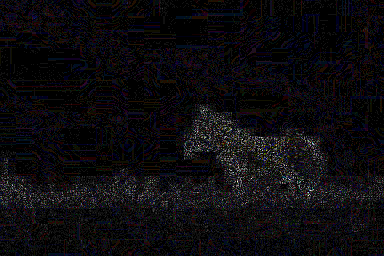

In [15]:
img_difference(df_AU['img'][0],df_AU['img_resaved'][0])

In [16]:
def prep_dataset(data):
    X = []
    y = []
    for index, row in data.iterrows():
        if img_file!="C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Au\\Thumbs.db" and img_file!="C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Tp\\Thumbs.db":
            x= img_difference(row['img'], row['img_resaved']).resize((128,128))
            X.append(np.array(x).flatten()/255.0)
            y.append([1,0] if row['label'] == 'Au' else [0,1])
    return X, y


In [17]:
X_AU, y_AU = prep_dataset(df_AU)

In [18]:
X_TP, y_TP=prep_dataset(df_TP)

In [19]:
X=X_AU+X_TP

In [20]:
y=y_AU+y_TP

In [21]:
len(X)

2000

In [22]:
joblib.dump(X, 'X_90.joblib')
joblib.dump(y, 'y.joblib')

['y.joblib']

### Train-Test Split


In [23]:
X = joblib.load('X_90.joblib')
y = joblib.load('y.joblib')

In [24]:
X

[array([0.05490196, 0.03137255, 0.05098039, ..., 0.03921569, 0.05098039,
        0.12156863]),
 array([0.10980392, 0.05882353, 0.34509804, ..., 0.08627451, 0.08235294,
        0.12156863]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.02745098,
        0.16862745]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0

In [25]:
from sklearn.model_selection import train_test_split
X=np.array(X)
y=np.array(y)
print("X: ",X)
print("y: ",y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X:  [[0.05490196 0.03137255 0.05098039 ... 0.03921569 0.05098039 0.12156863]
 [0.10980392 0.05882353 0.34509804 ... 0.08627451 0.08235294 0.12156863]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.10196078 0.0745098  0.07058824 ... 0.         0.         0.        ]
 [0.10588235 0.10980392 0.11372549 ... 0.         0.         0.        ]
 [0.01176471 0.01176471 0.01176471 ... 0.12156863 0.14509804 0.1254902 ]]
y:  [[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


### Data Generator


In [26]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, X, y, batch_size=32):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.X)/self.batch_size))
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        X = [self.X[k] for k in indexes]
        y = [self.y[k] for k in indexes]
        return np.array(X), np.array(y)
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.X))
        np.random.shuffle(self.indexes)

In [27]:
X_train=X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test=X_test.reshape(X_test.shape[0], 128, 128, 3)

y_train=y_train.reshape(y_train.shape[0], 2)
y_test=y_test.reshape(y_test.shape[0], 2)

In [28]:
train_data = DataGenerator(X_train, y_train)
val_data = DataGenerator(X_test, y_test)

In [29]:
import gc

del(X)
del(y)
gc.collect()

0

### Model Building


In [30]:
def build_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    return model

In [31]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [32]:
cal1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cal2 = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=15, validation_data=val_data, callbacks=[cal1, cal2])
history =  history.history


Epoch 1/15
50/50 [==============================] - 13s 243ms/step - loss: 0.6069 - accuracy: 0.6587 - val_loss: 0.4717 - val_accuracy: 0.7917
Epoch 2/15
50/50 [==============================] - 12s 235ms/step - loss: 0.4340 - accuracy: 0.8188 - val_loss: 0.5355 - val_accuracy: 0.7500
Epoch 3/15
50/50 [==============================] - 12s 240ms/step - loss: 0.4185 - accuracy: 0.8244 - val_loss: 0.4018 - val_accuracy: 0.8307
Epoch 4/15
50/50 [==============================] - 12s 240ms/step - loss: 0.3668 - accuracy: 0.8525 - val_loss: 0.3790 - val_accuracy: 0.8411
Epoch 5/15
50/50 [==============================] - 12s 242ms/step - loss: 0.3352 - accuracy: 0.8606 - val_loss: 0.4074 - val_accuracy: 0.8151
Epoch 6/15
50/50 [==============================] - 12s 242ms/step - loss: 0.2973 - accuracy: 0.8706 - val_loss: 0.3487 - val_accuracy: 0.8620
Epoch 7/15
50/50 [==============================] - 13s 251ms/step - loss: 0.2313 - accuracy: 0.9044 - val_loss: 0.4079 - val_accuracy: 0.8047

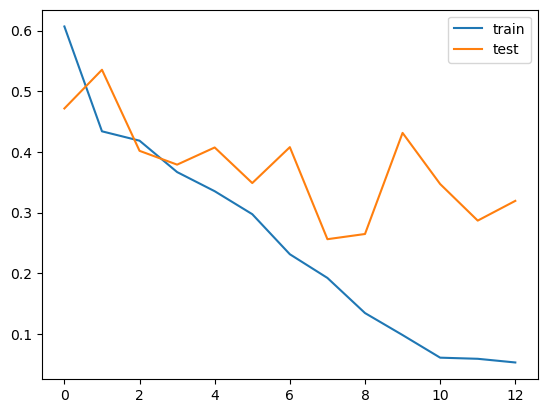

In [33]:
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.legend()
plt.show()


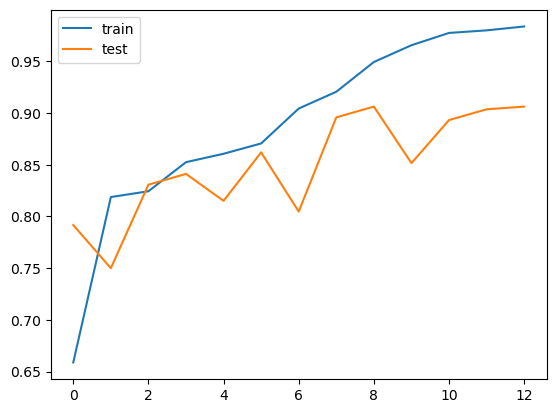

In [34]:
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [35]:
model.save("model1.h5")

In [36]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

def print_score(acc, precision, recall):
    print(f"Recall score: {recall}")
    print(f"Precision score: {precision}")
    print(f"Accuracy score: {acc}")


In [37]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)
y_t=np.argmax(y_train, axis=1)
print("Train accuracy")
print_score(recall=recall_score(y_pred=y_pred, y_true=y_t), precision=precision_score(
    y_pred=y_pred, y_true=y_t), acc=accuracy_score(y_pred=y_pred, y_true=y_t))

50/50 [==============================] - 3s 52ms/step
Train accuracy
Recall score: 0.9825
Precision score: 0.9401913875598086
Accuracy score: 0.96


In [38]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_t=np.argmax(y_test, axis=1)
print("test accuracy")
print_score(recall=recall_score(y_pred=y_pred, y_true=y_t), precision=precision_score(
    y_pred=y_pred, y_true=y_t), acc=accuracy_score(y_pred=y_pred, y_true=y_t))

13/13 [==============================] - 1s 47ms/step
test accuracy
Recall score: 0.9
Precision score: 0.8910891089108911
Accuracy score: 0.895


In [39]:

def difference(path):
    filename = path
    resaved_name = filename.split('.')[-2]+'_resaved.jpg'
    resaved_name = resaved_name.split('/')[-1]
    org = Image.open(filename).convert('RGB')
    org.save(resaved_name, 'JPEG', quality=92)
    resaved = Image.open(resaved_name)
    diff = ImageChops.difference(org, resaved)
    extrema = diff.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    diff = ImageEnhance.Brightness(diff).enhance(scale)
    enhancer = ImageEnhance.Sharpness(diff)
    diff = enhancer.enhance(1.5)
    return diff


# TESTING

In [40]:
from tensorflow.keras.models import load_model
model = load_model("C:\\Users\\jayas\\Downloads\\dip\\model1.h5")

In [41]:
from pylab import *
def detect():
    path=input("enter image path: \n")

    try:
        img= Image.open(path)
        subplot(2,1,1)
        imshow(img)
        img=np.array(difference(path).resize((128, 128)))
        subplot(2,1,2)
        imshow(img)
        img=img.flatten()/255.0
        img=img.reshape(-1, 128, 128, 3)
        pred= model.predict(img)[0]
        if pred[0]>pred[1]:
            print("Not Forged")
        else:
            print('Forged')
    except:
        print("Image does not Exist.\nWorng path")

enter image path: 
 C:\\Users\\jayas\\Downloads\\dip\CASIA2\\Resaved\\Tp_S_NRN_S_B_pla20098_pla20098_02344resaved.jpg


1/1 [==============================] - 0s 91ms/step
Forged


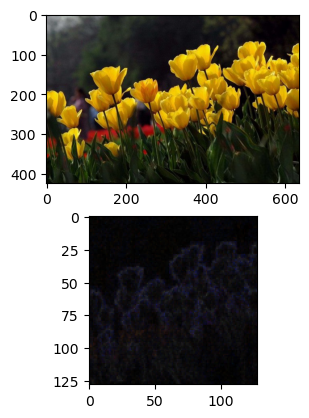

In [42]:
detect()

enter image path: 
 C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Au\\Au_txt_30028.jpg


1/1 [==============================] - 0s 39ms/step
Not Forged


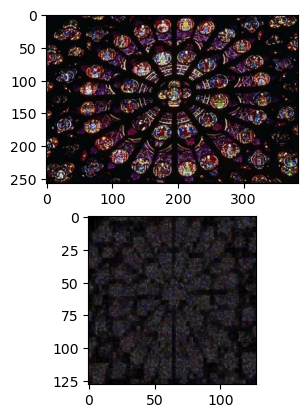

In [44]:
detect()

enter image path: 
 C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Tp\\Tp_S_NRN_S_N_arc00062_ani00070_11498.jpg


1/1 [==============================] - 0s 36ms/step
Forged


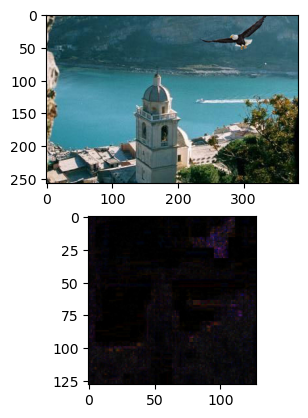

In [46]:
detect()

enter image path: 
 C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Tp\\Tp_S_NRN_S_N_ani10144_ani10144_12471.jpg


1/1 [==============================] - 0s 28ms/step
Forged


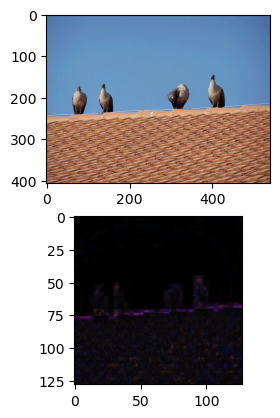

In [47]:
detect()

enter image path: 
 C:\\Users\\jayas\\Downloads\\dip\\CASIA2\\Au\\Au_ani_10144.jpg


1/1 [==============================] - 0s 26ms/step
Not Forged


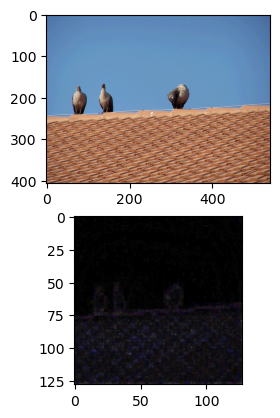

In [49]:
detect()

In [ ]:
detect()

In [ ]:
detect()

In [ ]:
detect()

In [ ]:
detect()